Vamos a entrenar el modelo sin ninguna anomalía introduciendo el concpeto de temporalidad y series temporales:

- ¿Siempre da anomalías?
- ¿Es verdad que no necesita anomalías para entrenar?

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import IsolationForest

In [56]:
# Get x values of the sine wave
time = np.arange(0, 50, 0.1)
# Amplitude of the sine wave is sine of a variable like time
data = np.sin(time)

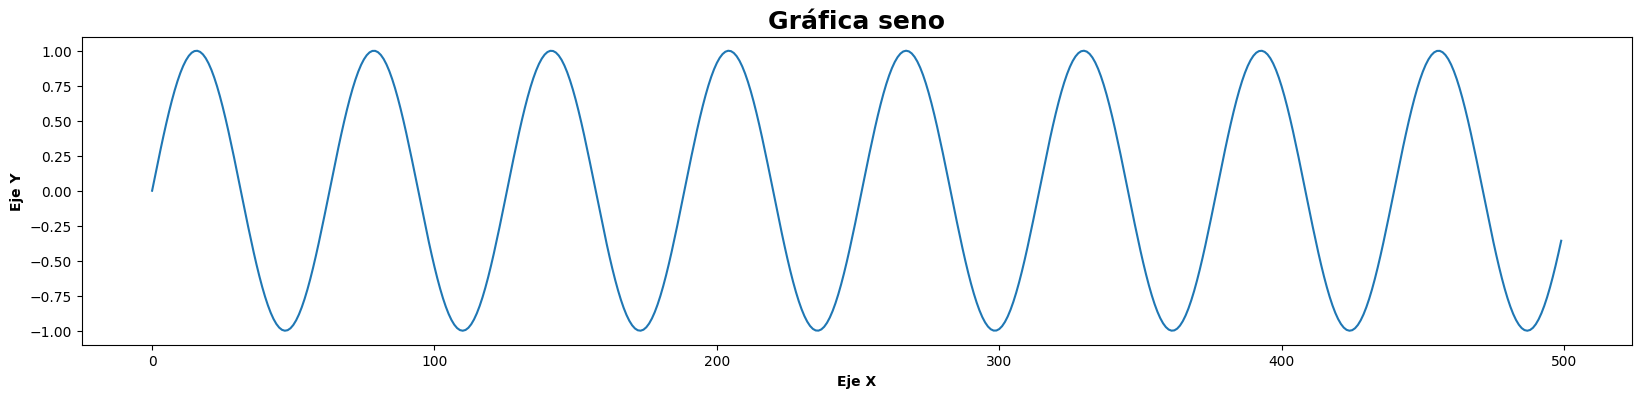

In [57]:
plt.figure(figsize=(20,4))
plt.plot(data)
plt.title('Gráfica seno', fontweight ='bold', size=18)
plt.xlabel('Eje X', fontweight ='bold'); plt.ylabel('Eje Y', fontweight ='bold')

plt.show()

In [58]:
def univariateTimeSerie(data, size, gap):
    """
    Función para generar las series temporales.
    Parámetros:
        · data: Los datos de trabajo.
        · size: El número de datos que contendrá cada conjunto de datos.
        · gap: Instante de tiempo del futuro que queremos predecir.
    return:
        · x_values: Array con el conjunto de datos que debemos aprender a
          predecir. Este será del tamaño definido por el input size.
        · y_values: Array con el valor de los datos que debería predecir para
          su equivalente x_values. Este se definirá por el input gap.
    """
    x_values, y_values = [], []
    gap = gap - 1
    for i in range(size, len(data)):
        pred_day = i + gap
        x_values.append(data[pred_day-size:pred_day, 0])
        y_values.append([data[pred_day, 0]])
    
    return np.array(x_values), np.array(y_values)

In [59]:
# Formateamos datos.
data = data.reshape(data.shape[0], 1)
# Creamos nuestra serie temporal
X, Y = univariateTimeSerie(data, size=5, gap=1)
print(X.shape)
print(Y.shape)

(495, 5)
(495, 1)


In [60]:


# Crear un DataFrame de pandas
data = pd.DataFrame(np.concatenate([X, Y], axis=1), columns=[f'X{i}' for i in range(X.shape[1])] + ['Y'])

# Visualizar el DataFrame
data.head()

,X0,X1,X2,X3,X4,Y
0,0.000000,0.099833,0.198669,0.295520,0.389418,0.479426
1,0.099833,0.198669,0.295520,0.389418,0.479426,0.564642
2,0.198669,0.295520,0.389418,0.479426,0.564642,0.644218
3,0.295520,0.389418,0.479426,0.564642,0.644218,0.717356
4,0.389418,0.479426,0.564642,0.644218,0.717356,0.783327


In [61]:
# Crear y ajustar el modelo de Isolation Forest
modelo_if = IsolationForest(contamination=0.1)  # Ajusta el valor de contaminación según tus necesidades
modelo_if.fit(X)

# Predecir las anomalías (outliers)
predicciones = modelo_if.predict(X)

# Agregar las predicciones al DataFrame
data['Predicciones'] = predicciones

# Visualizar el DataFrame con las predicciones
print(data.head())

         X0        X1        X2        X3        X4         Y  Predicciones
0  0.000000  0.099833  0.198669  0.295520  0.389418  0.479426             1
1  0.099833  0.198669  0.295520  0.389418  0.479426  0.564642            -1
2  0.198669  0.295520  0.389418  0.479426  0.564642  0.644218             1
3  0.295520  0.389418  0.479426  0.564642  0.644218  0.717356            -1
4  0.389418  0.479426  0.564642  0.644218  0.717356  0.783327             1


In [62]:
res = data['Predicciones'].values
res

array([ 1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1,
        1,  1,  1,  1,  1

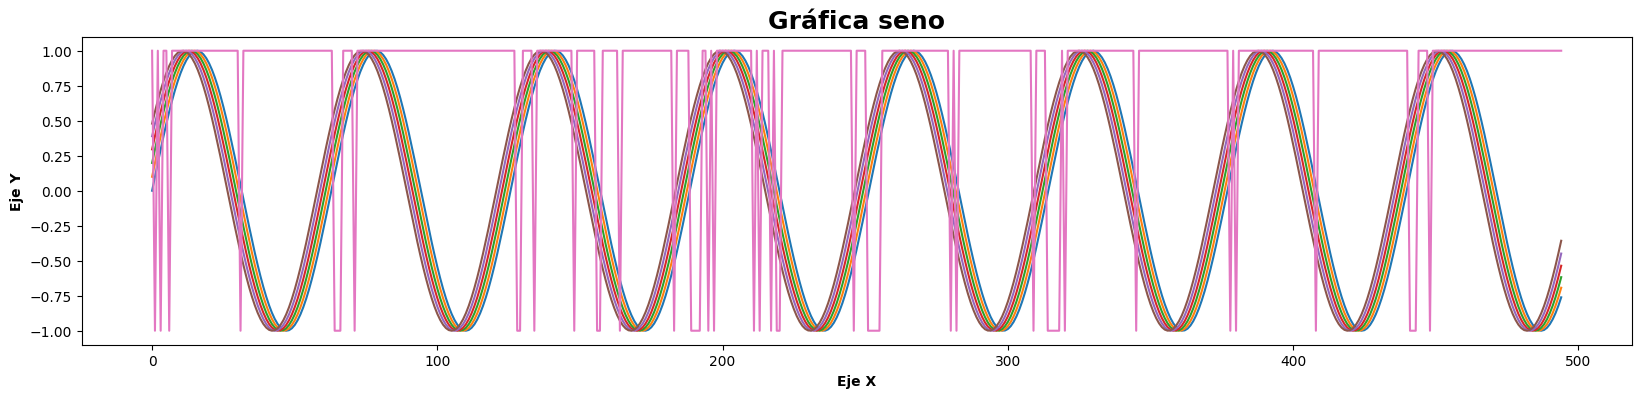

In [63]:
plt.figure(figsize=(20,4))
plt.plot(data)
plt.title('Gráfica seno', fontweight ='bold', size=18)
plt.xlabel('Eje X', fontweight ='bold'); plt.ylabel('Eje Y', fontweight ='bold')

plt.show()